In [1]:
import pandas as pd
from proj1_helpers import *
from data_preprocessing import *
import sympy 

In [2]:
y, x, ids = load_csv_data("./data/train.csv", sub_sample=False)
x, mean_x, std_x = standardize(x)
y[0:20], mean_x, std_x

(array([ 1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
        -1., -1.,  1., -1.,  1., -1., -1.]),
 array([-4.90230794e+01,  4.92398193e+01,  8.11819816e+01,  5.78959617e+01,
        -7.08420675e+02, -6.01237051e+02, -7.09356603e+02,  2.37309984e+00,
         1.89173324e+01,  1.58432217e+02,  1.43760943e+00, -1.28304708e-01,
        -7.08985189e+02,  3.87074191e+01, -1.09730480e-02, -8.17107200e-03,
         4.66602072e+01, -1.95074680e-02,  4.35429640e-02,  4.17172345e+01,
        -1.01191920e-02,  2.09797178e+02,  9.79176000e-01, -3.48329567e+02,
        -3.99254314e+02, -3.99259788e+02, -6.92381204e+02, -7.09121609e+02,
        -7.09118631e+02,  7.30645914e+01]),
 array([406.34483401,  35.34481492,  40.82860887,  63.65555431,
        454.47965615, 657.97098617, 453.01897051,   0.78290955,
         22.2734492 , 115.70588372,   0.84474126,   1.19358245,
        453.59581401,  22.41203584,   1.21407622,   1.81675941,
         22.06487828,   1.26497962,   1.81660763, 

In [7]:
train_data = pd.read_csv("data/train.csv.zip", na_values=-999)
cols = train_data.columns[2:]

train_data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226
2,100002,b,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251
3,100003,b,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,...,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,100004,b,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,...,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000


array([[138.47 ,  51.655,  97.827, ...,   1.24 ,  -2.475, 113.497],
       [160.937,  68.768, 103.235, ...,     nan,     nan,  46.226],
       [    nan, 162.172, 125.953, ...,     nan,     nan,  44.251],
       ...,
       [105.457,  60.526,  75.839, ...,     nan,     nan,  41.992],
       [ 94.951,  19.362,  68.812, ...,     nan,     nan,   0.   ],
       [    nan,  72.756,  70.831, ...,     nan,     nan,   0.   ]])

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


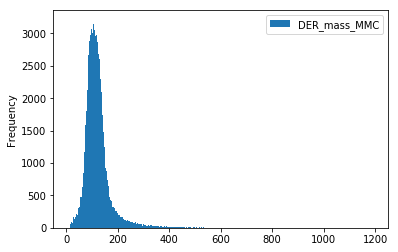

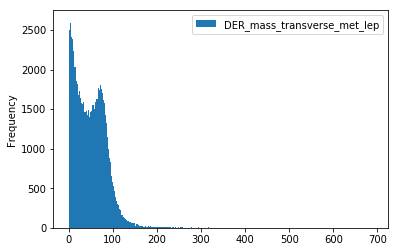

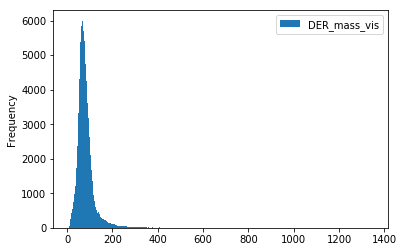

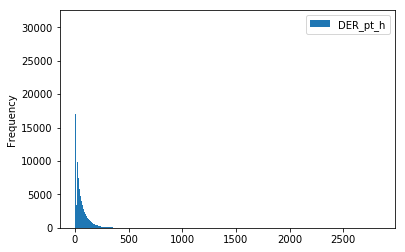

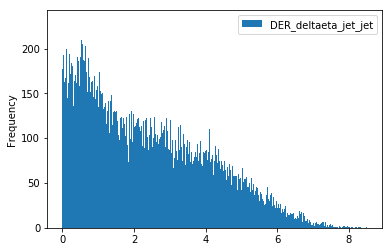

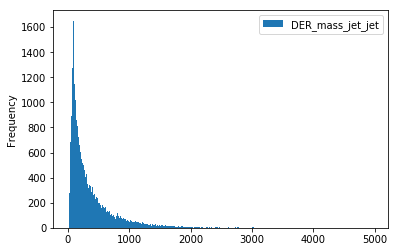

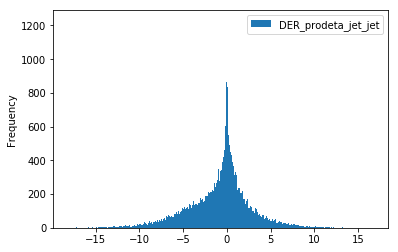

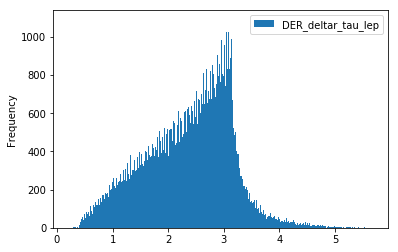

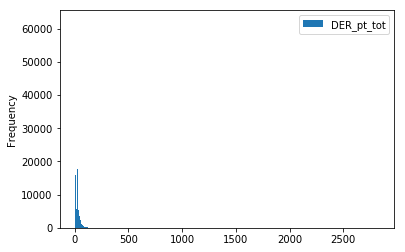

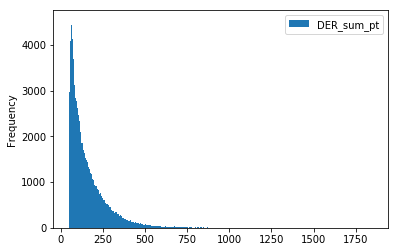

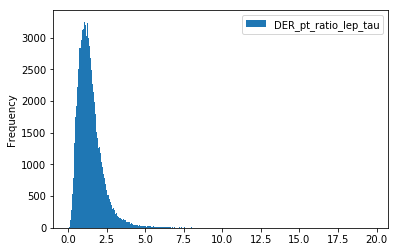

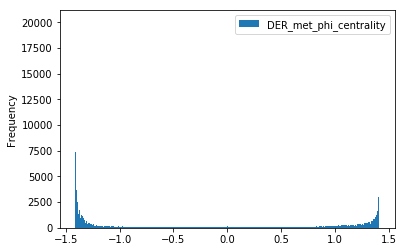

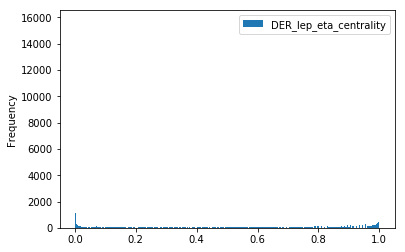

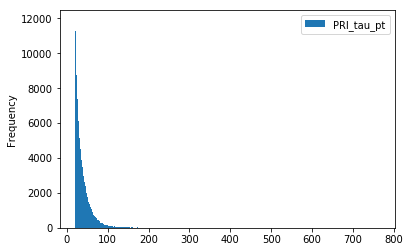

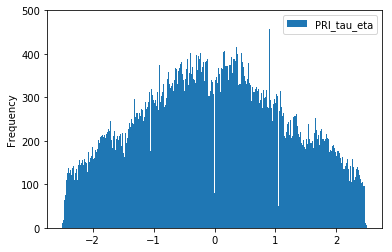

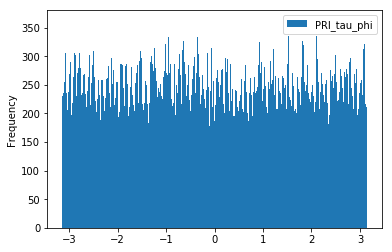

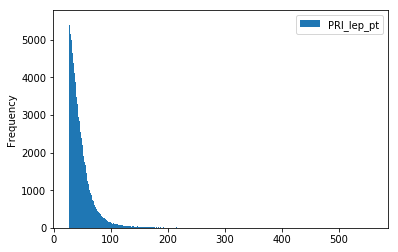

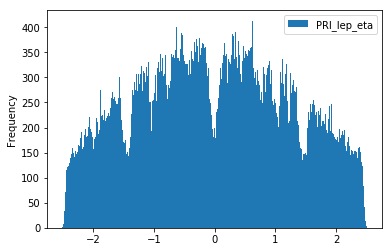

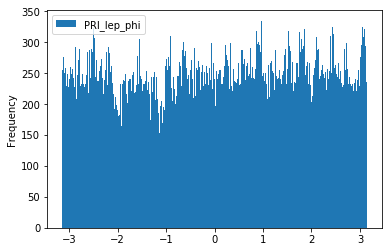

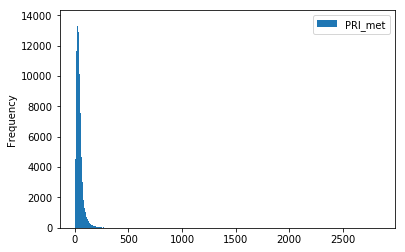

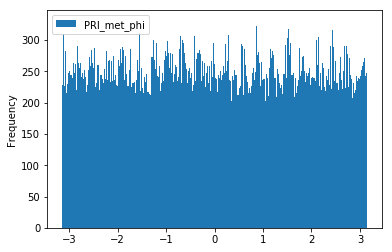

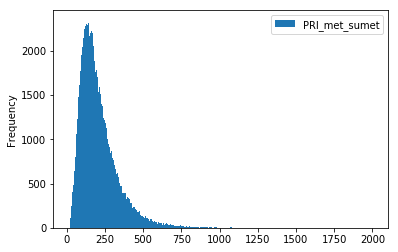

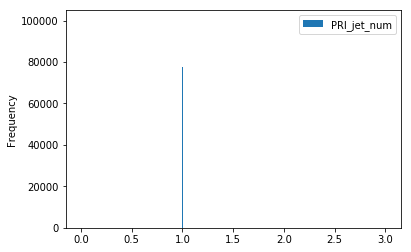

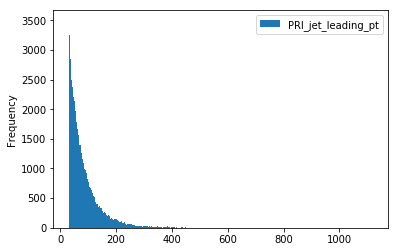

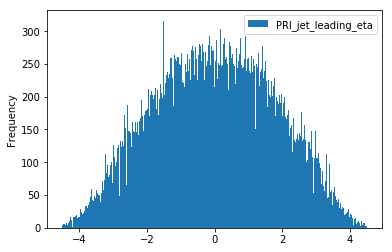

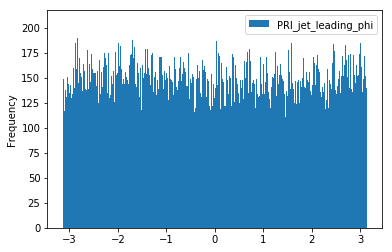

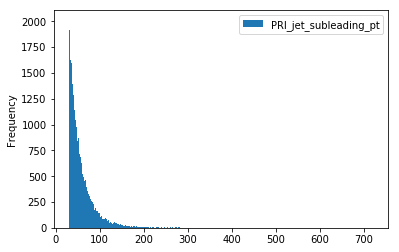

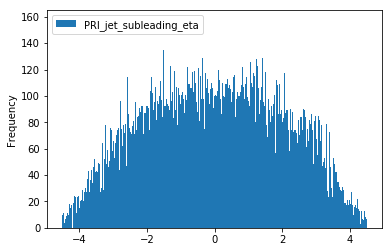

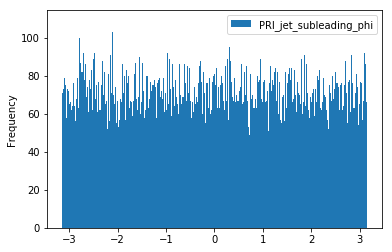

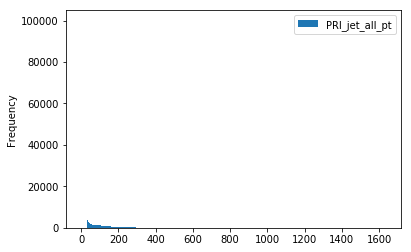

In [5]:
#Plots
for col in cols:
    train_data[[col]].plot.hist(train_data[col], bins=1000)

In [31]:
train_data_zero = train_data.fillna(0)

x = train_data_zero[cols].values
x.shape, train_data_zero.shape
train_data_zero.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,0.00,0.000,0.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,0.000,0.00,0.000,46.226
2,100002,b,0.000,162.172,125.953,35.635,0.00,0.000,0.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,0.000,0.00,0.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,0.00,0.000,0.000,3.310,...,0.060,86.062,0,0.000,0.000,0.000,0.000,0.00,0.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,0.00,0.000,0.000,3.891,...,-0.871,53.131,0,0.000,0.000,0.000,0.000,0.00,0.000,0.000


In [37]:
tx, mean_x, std_x = standardize(x)
col1 = train_data_zero.DER_mass_MMC
col1.mean(), col1.std()


(103.28046455999846, 68.56610266357846)

In [40]:
(col1[0] - col1.mean()) / col1.std()

0.5132205867476528

In [41]:
tx[0]

array([ 0.51322161,  0.06833197,  0.40768027, -0.46996624,  0.14766948,
        0.06171609,  1.47696942,  0.88247762,  1.03309853,  0.33989441,
        0.17092875,  1.27708372,  0.22416198, -0.2708107 ,  0.84671212,
        0.21421167,  0.22505416,  1.81228807, -1.35281991, -0.75675685,
       -0.14726741,  0.38684673,  1.04440205,  0.26321319,  1.55634999,
        0.32129634,  0.93574149,  1.1361225 , -2.52828975,  0.4125105 ])

In [48]:
#train_data_std = pd.DataFrame(data=tx,    # values
#                 index=train_data_zero.index,    # 1st column as index
#                 columns=train_data_zero.col)

def standardize_col(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis = 0)
    x = x - mean_x
    std_x = np.std(x, axis = 0)
    x = x / std_x
    return x

train_data_std = train_data_zero.copy()
train_data_std = train_data_std[train_data.columns[2:]].apply(lambda col: standardize_col(col), axis = 0)
train_data_std.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.513222,0.068332,0.407680,-0.469966,0.147669,0.061716,1.476969,0.882478,1.033099,0.339894,...,-0.147267,0.386847,1.044402,0.263213,1.556350,0.321296,0.935741,1.136122,-2.528290,0.412510
1,0.840891,0.552505,0.540136,-0.153167,-0.484693,-0.395606,0.121248,1.404888,-0.756027,-0.287584,...,-1.051683,-0.357719,0.021305,-0.074869,0.525758,0.829460,-0.534065,0.003141,0.000469,-0.273820
2,-1.506293,3.195156,1.096560,-0.349710,-0.484693,-0.395606,0.121248,0.989770,-0.430168,0.340361,...,-1.200672,0.400135,0.021305,-0.106352,1.486197,-1.438062,-0.534065,0.003141,0.000469,-0.293970
3,0.592488,0.910379,-0.005853,-0.903016,-0.484693,-0.395606,0.121248,1.196690,-0.830735,-0.712705,...,0.038692,-0.978149,-1.001792,-0.811735,0.001422,0.005295,-0.534065,0.003141,0.000469,-0.745439
4,1.058594,-0.914556,1.313369,-0.651804,-0.484693,-0.395606,0.121248,1.938794,-0.112795,-0.868143,...,-0.475042,-1.238475,-1.001792,-0.811735,0.001422,0.005295,-0.534065,0.003141,0.000469,-0.745439


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


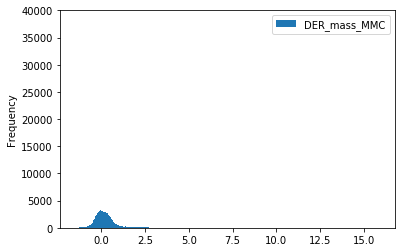

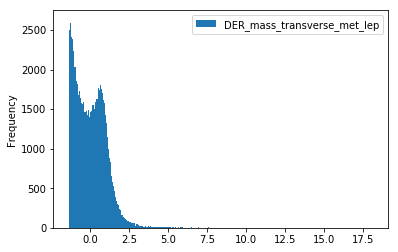

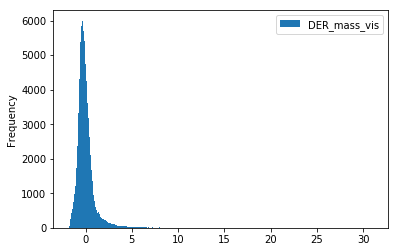

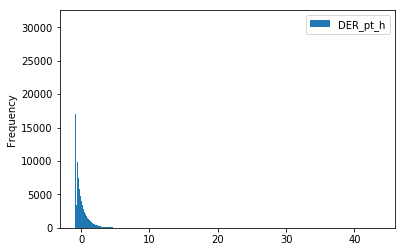

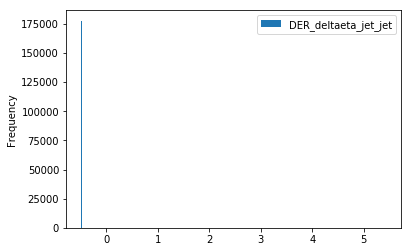

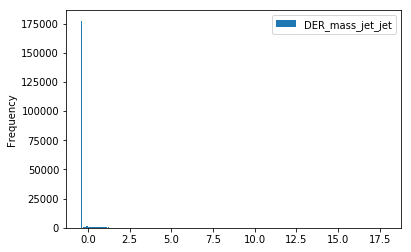

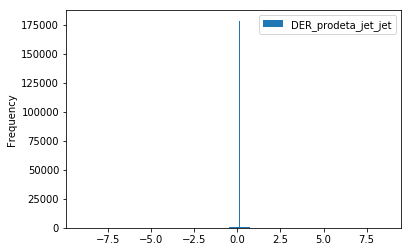

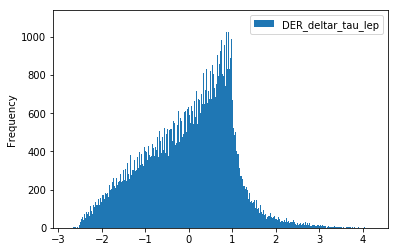

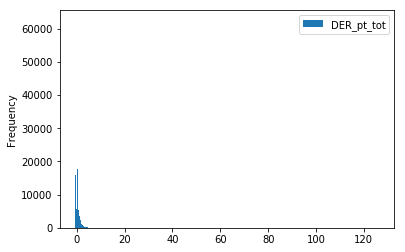

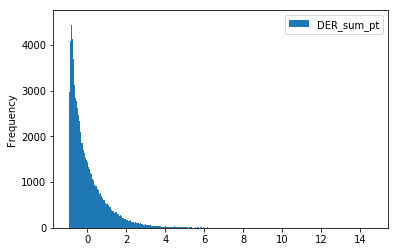

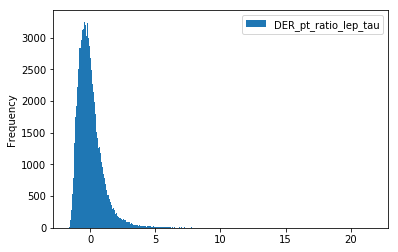

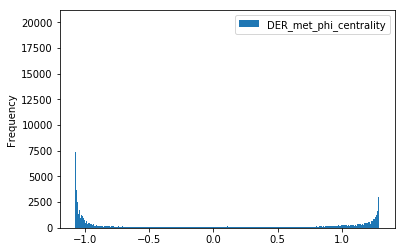

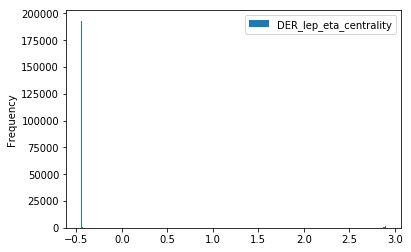

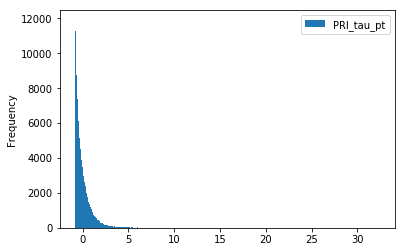

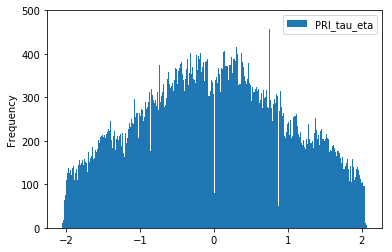

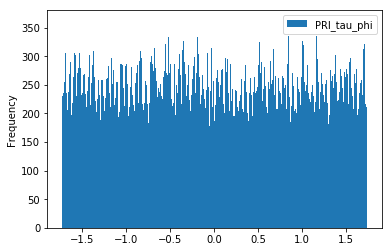

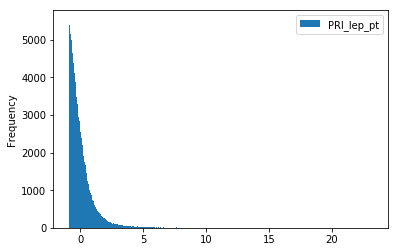

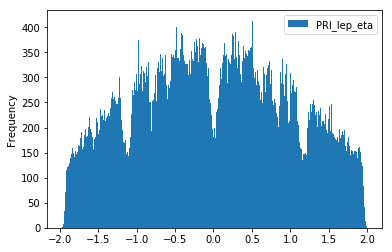

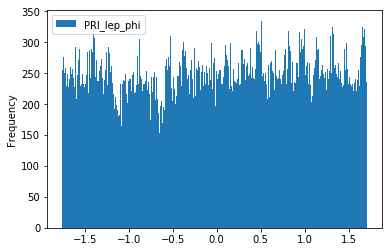

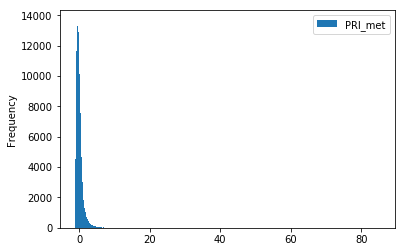

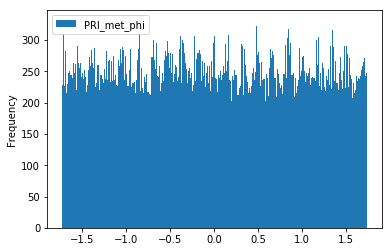

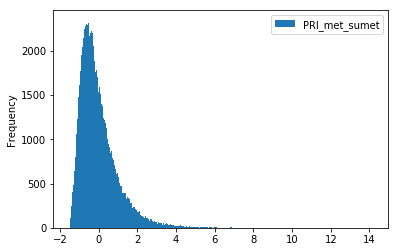

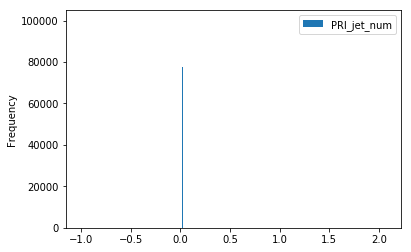

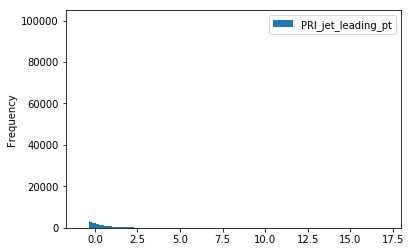

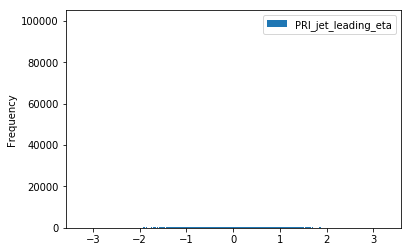

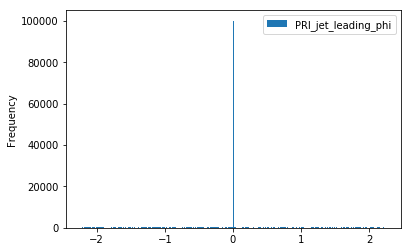

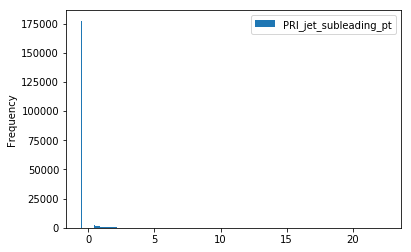

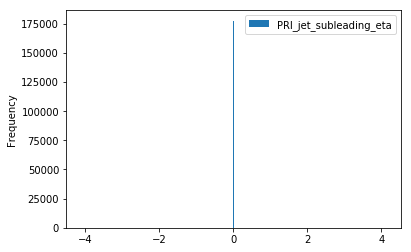

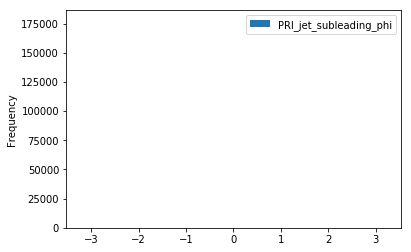

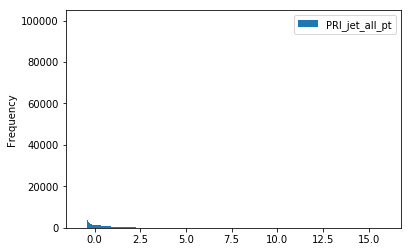

In [49]:
#Plots standardized
for col in cols:
    train_data_std[[col]].plot.hist(train_data_std[col], bins=1000)

We can maybe drop the colums *-phi, since they have values scattered everywhere and I think that they do not give much information about the model. **Look at the feature descriptions. Phi are mainly angles**

DER_mass_MMC: Normal right skewed
DER_mass_transverse_met_lep: normal with 2 bosses
DEr_Mass_vis: Normal right skewed


In [ ]:
# Tryng to figure out how many cols(features) are dependent
train_data_zero = train_data.fillna(0)
train_data_zero.drop(columns=['Id', 'Prediction'], inplace=True)
train_data_zero.head()

In [ ]:
#test to find linear dependancy
columns = ['A','B', 'C']
df = pd.DataFrame(columns=columns)
df.A = [0,2,3,4]
df.B = df.A*2
df.C = [8,3,5,4]
df

In [ ]:
# testing the function
reduced_form, inds = sympy.Matrix(df.values).rref()
#df.iloc[:, inds]
idx = [] 
for i in inds:
    idx.append(i)
df.iloc[:, idx]

In [50]:
# trying on real matrix - THIS WILL TAKE 2H30 TO RUN.
reduced_form, inds = sympy.Matrix(train_data_std.values).rref()


In [54]:
len(inds), train_data_std.shape

(30, (250000, 30))

They are all independant....? omg....

In [62]:
prediction_num = train_data_zero.Prediction.apply(lambda x: -1 if x == 'b' else 1)
train_data_std['Prediction'] = prediction_num
train_data_std.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Prediction
0,0.513222,0.068332,0.407680,-0.469966,0.147669,0.061716,1.476969,0.882478,1.033099,0.339894,...,0.386847,1.044402,0.263213,1.556350,0.321296,0.935741,1.136122,-2.528290,0.412510,1
1,0.840891,0.552505,0.540136,-0.153167,-0.484693,-0.395606,0.121248,1.404888,-0.756027,-0.287584,...,-0.357719,0.021305,-0.074869,0.525758,0.829460,-0.534065,0.003141,0.000469,-0.273820,-1
2,-1.506293,3.195156,1.096560,-0.349710,-0.484693,-0.395606,0.121248,0.989770,-0.430168,0.340361,...,0.400135,0.021305,-0.106352,1.486197,-1.438062,-0.534065,0.003141,0.000469,-0.293970,-1
3,0.592488,0.910379,-0.005853,-0.903016,-0.484693,-0.395606,0.121248,1.196690,-0.830735,-0.712705,...,-0.978149,-1.001792,-0.811735,0.001422,0.005295,-0.534065,0.003141,0.000469,-0.745439,-1
4,1.058594,-0.914556,1.313369,-0.651804,-0.484693,-0.395606,0.121248,1.938794,-0.112795,-0.868143,...,-1.238475,-1.001792,-0.811735,0.001422,0.005295,-0.534065,0.003141,0.000469,-0.745439,-1


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


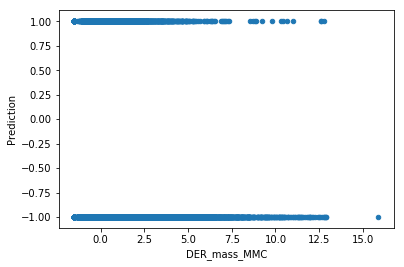

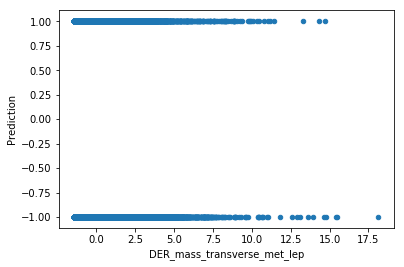

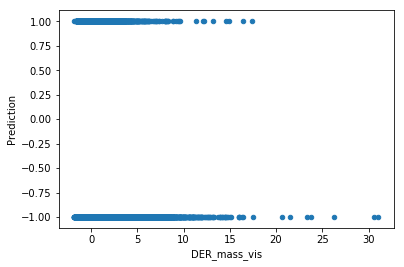

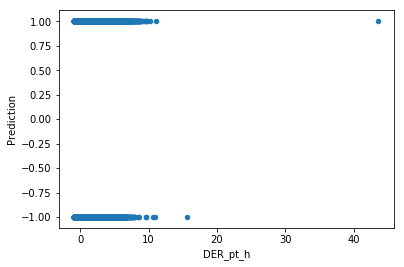

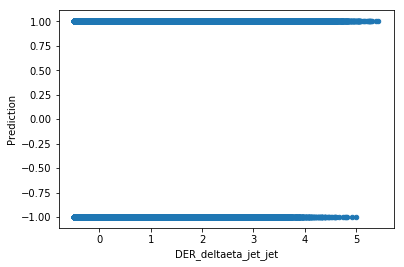

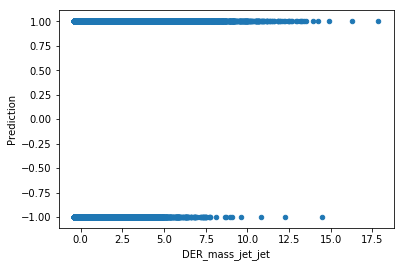

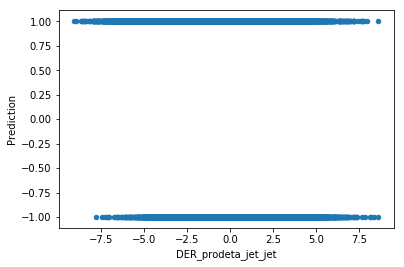

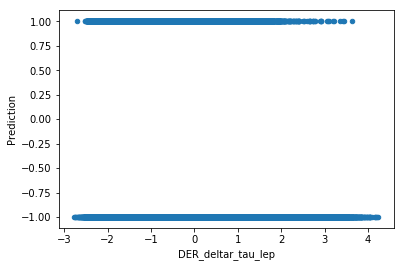

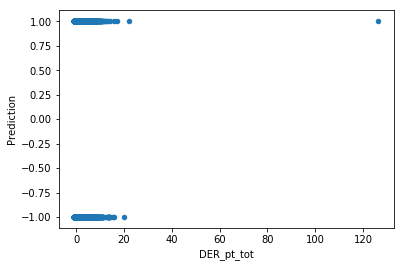

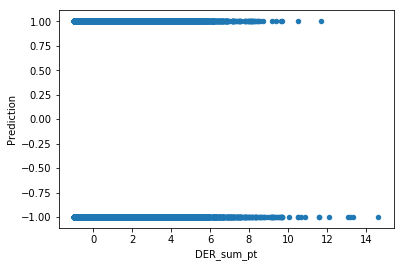

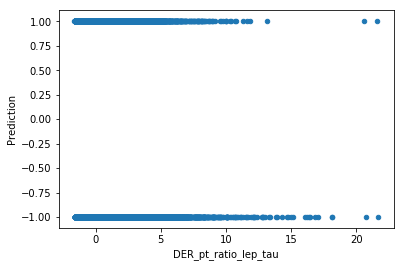

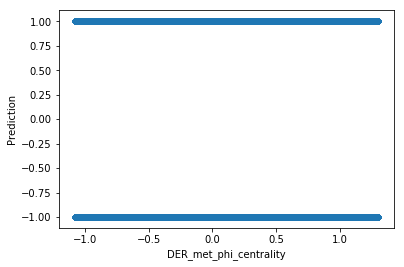

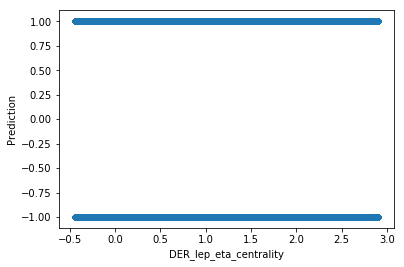

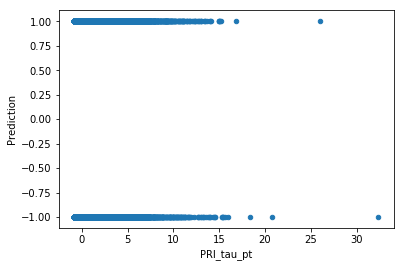

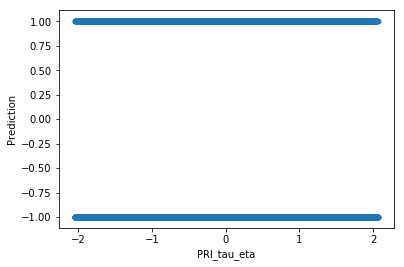

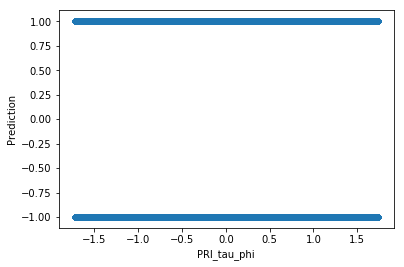

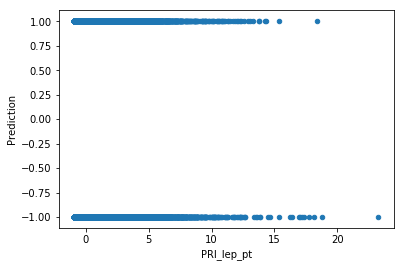

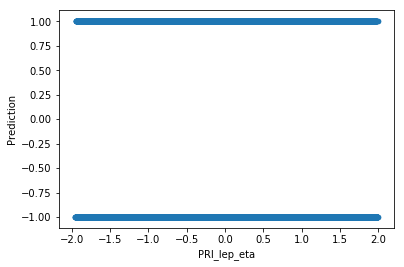

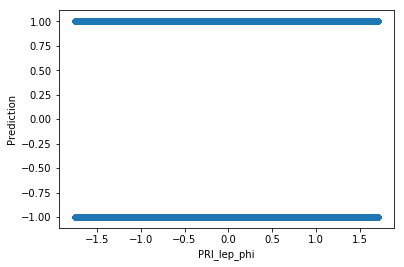

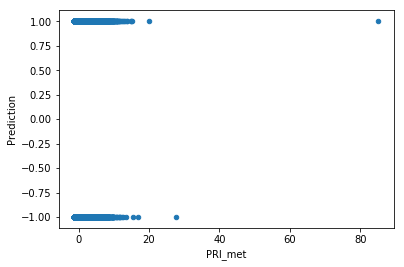

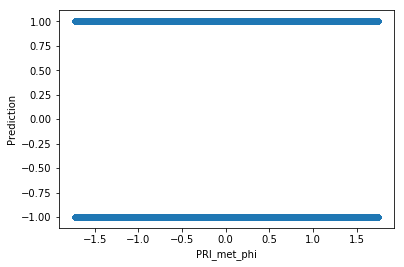

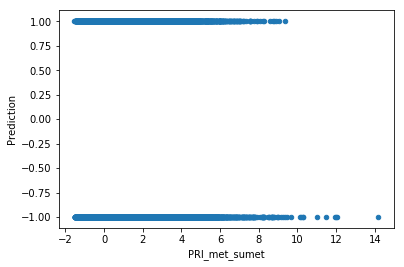

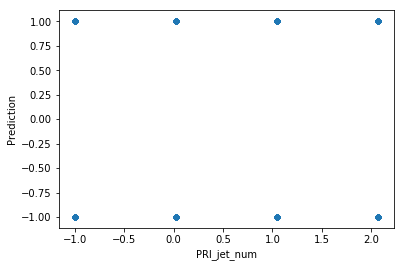

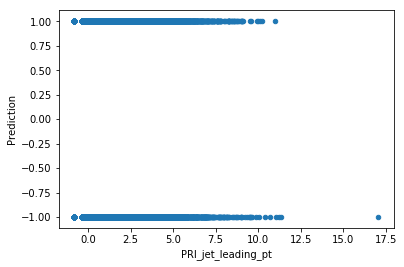

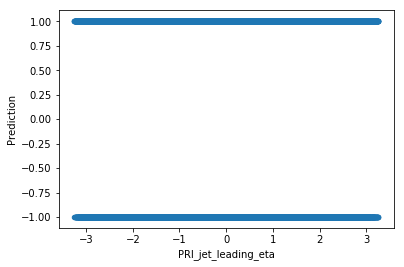

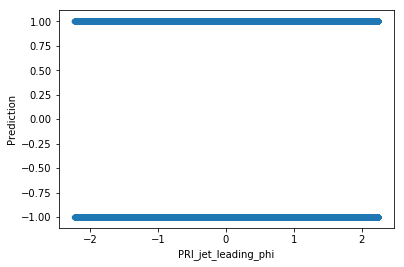

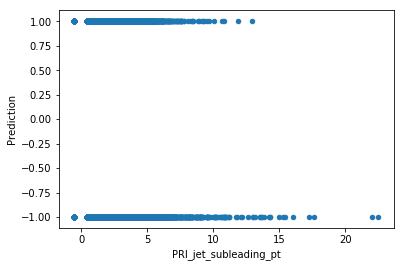

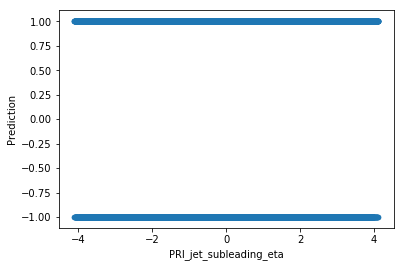

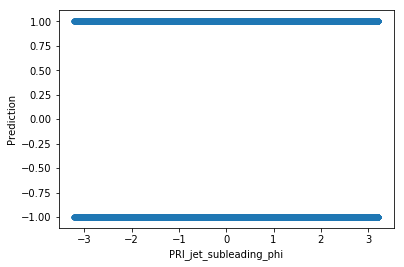

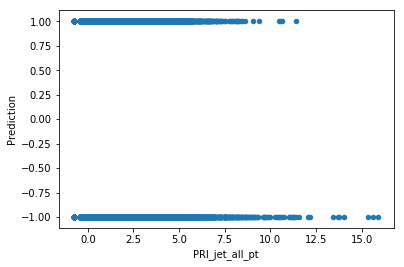

In [64]:
for col in cols:
    train_data_std.plot.scatter(x=col, y = 'Prediction')

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


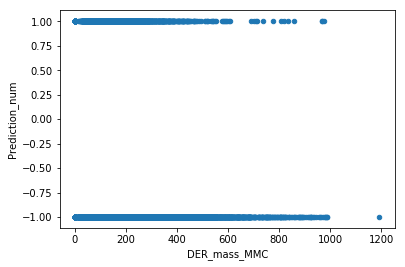

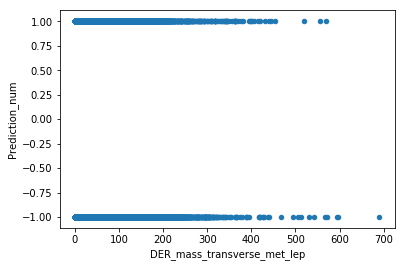

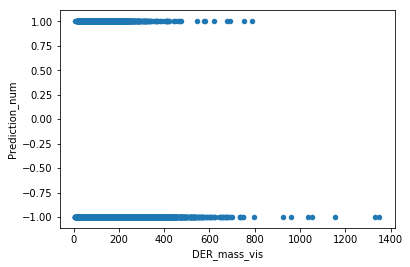

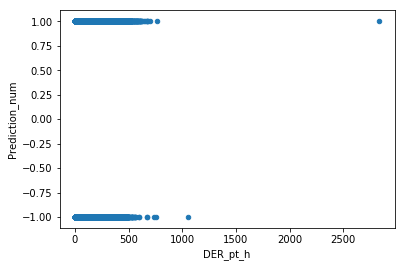

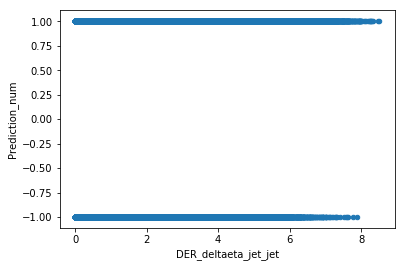

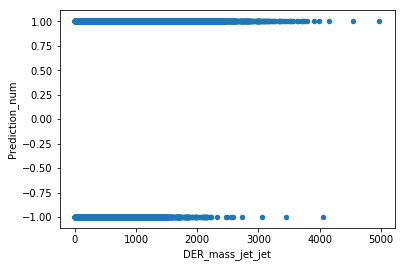

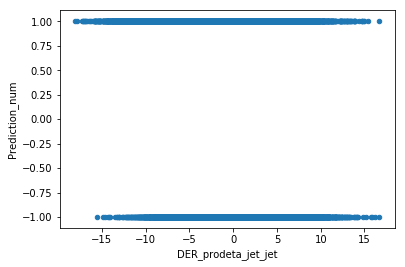

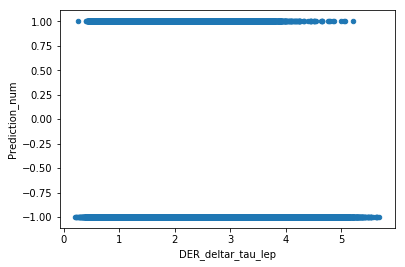

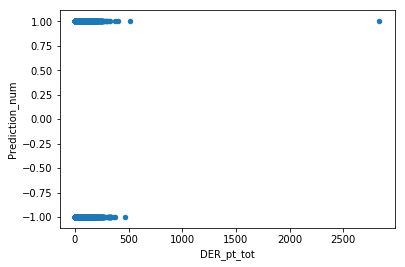

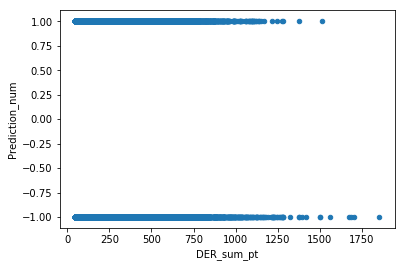

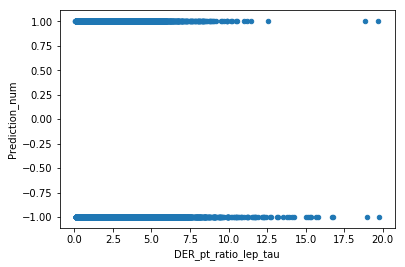

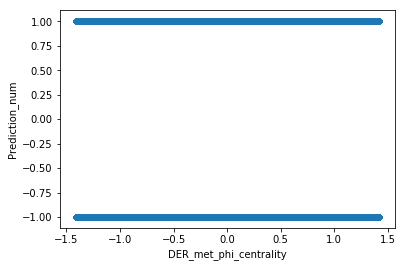

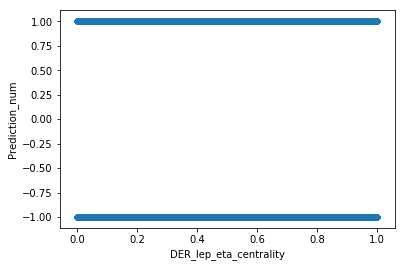

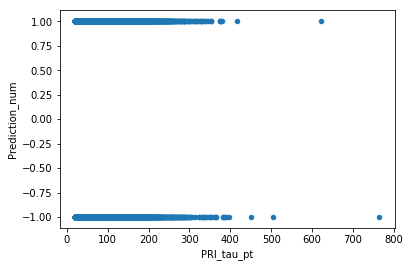

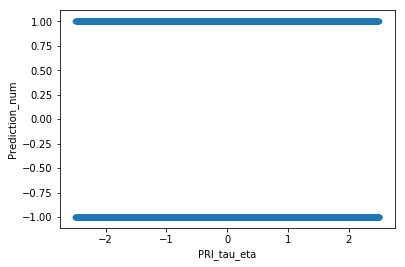

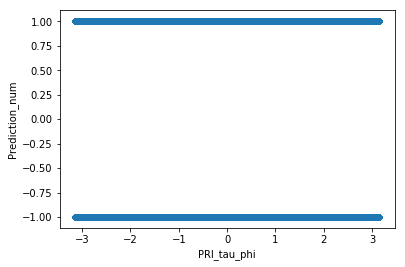

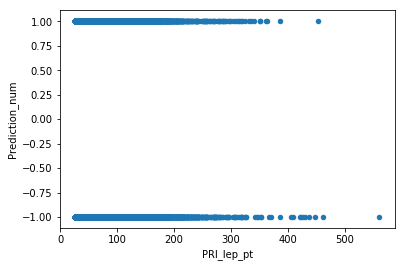

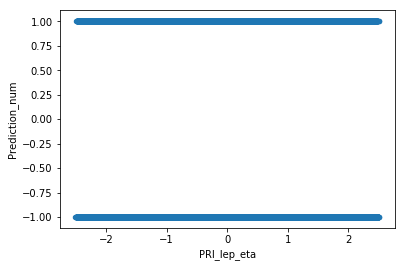

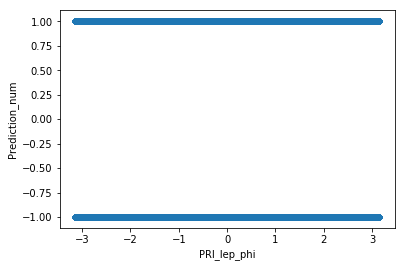

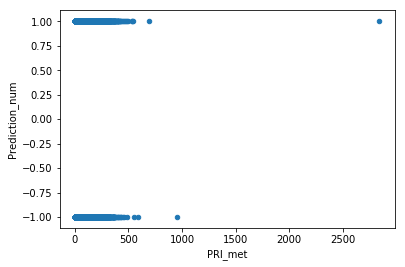

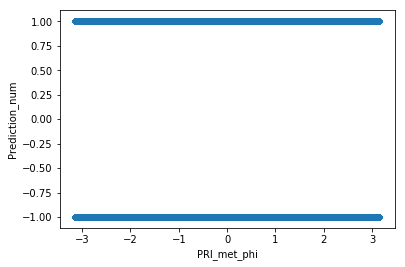

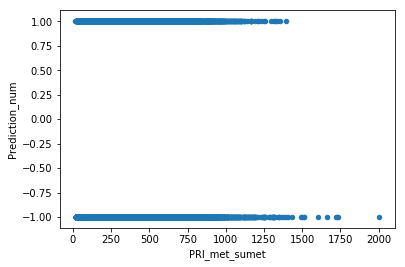

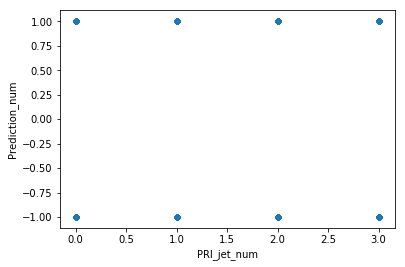

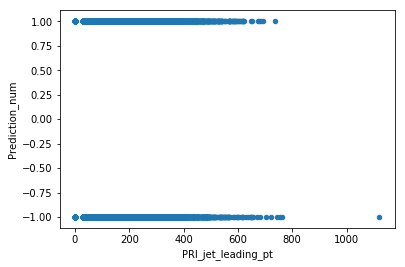

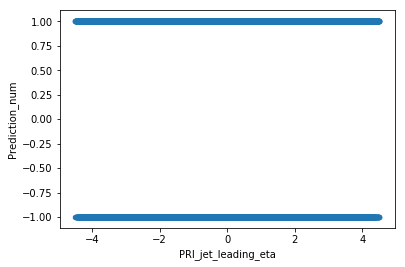

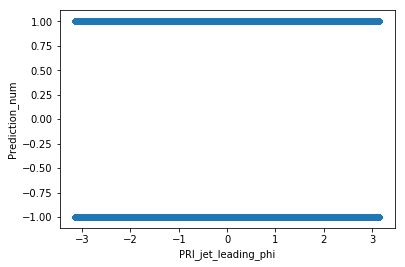

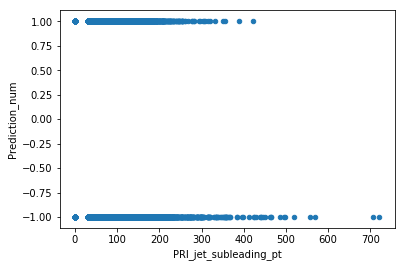

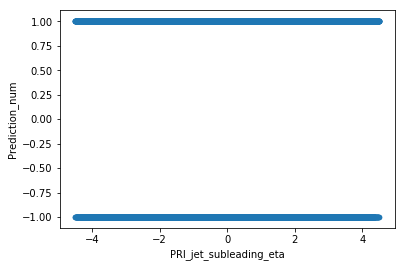

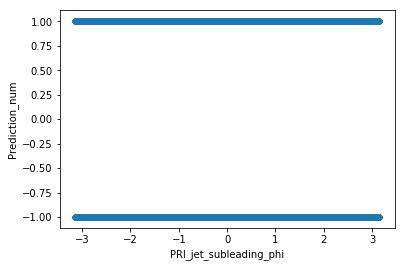

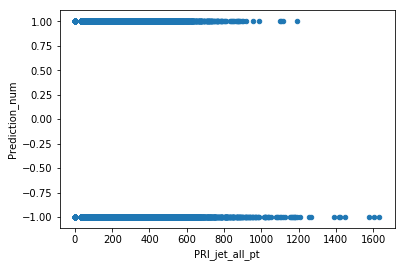

In [66]:
train_data_zero['Prediction_num'] = prediction_num
for col in cols:
    train_data_zero.plot.scatter(x=col, y = 'Prediction_num')

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


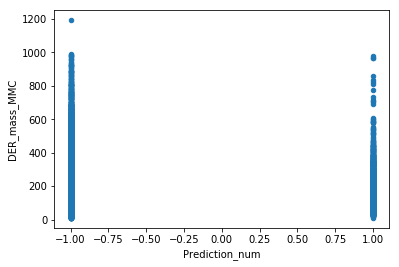

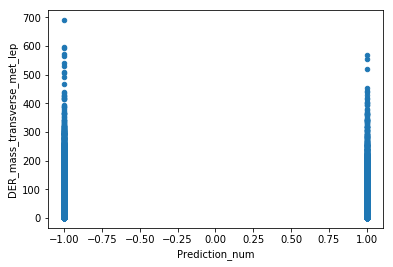

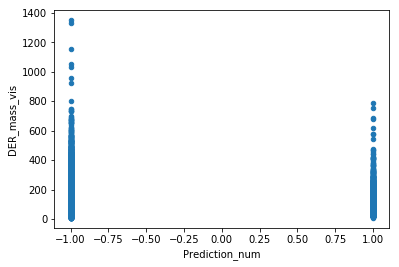

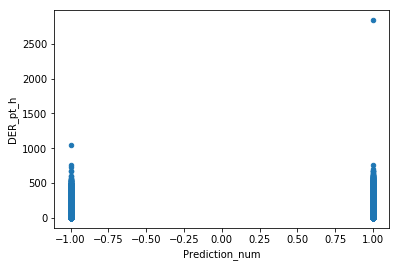

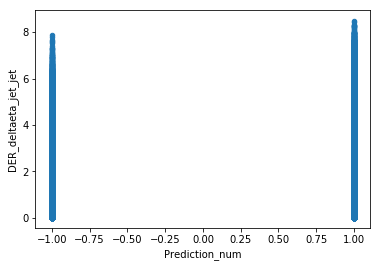

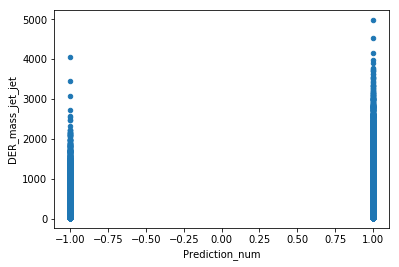

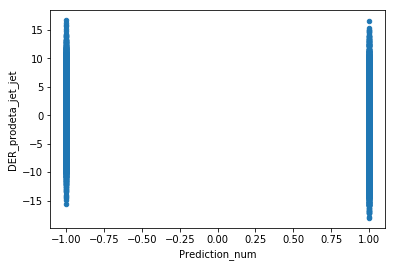

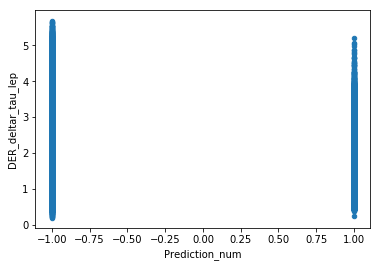

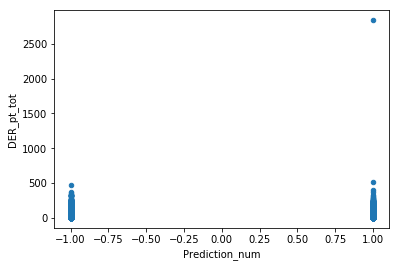

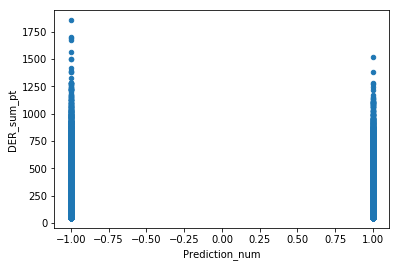

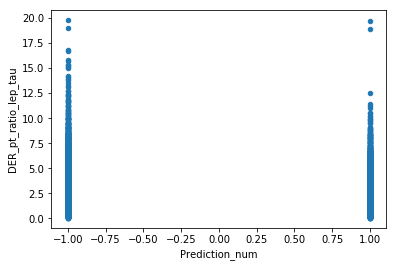

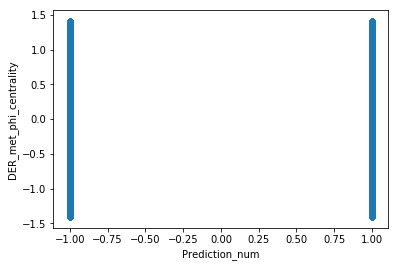

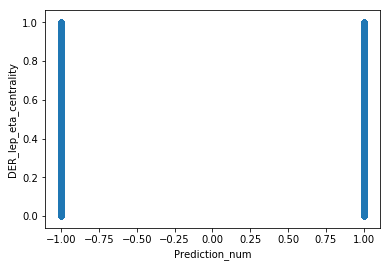

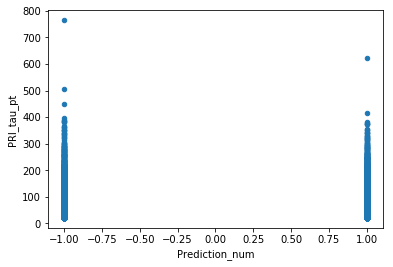

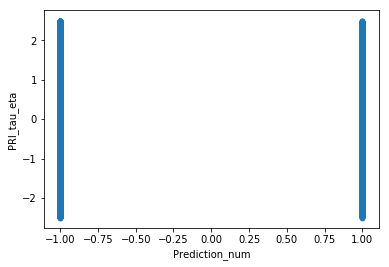

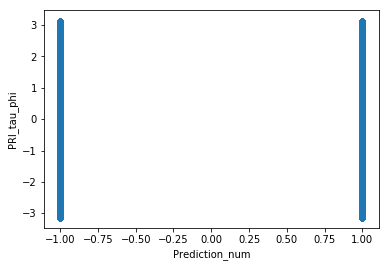

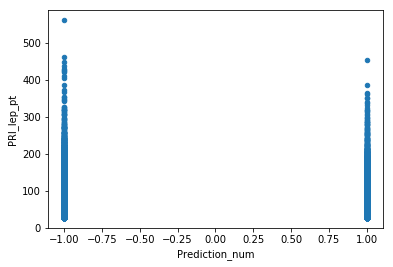

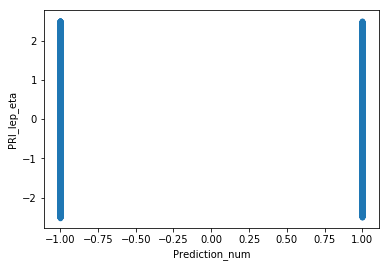

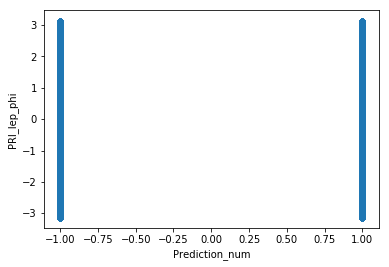

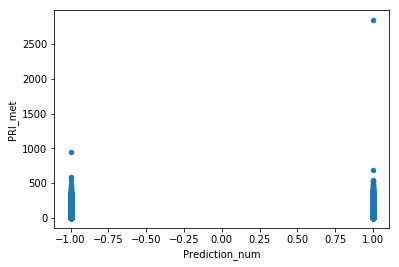

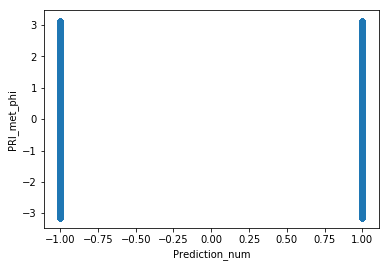

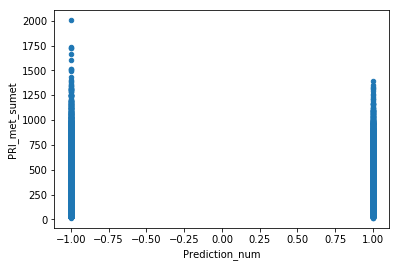

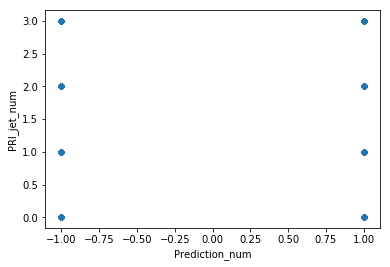

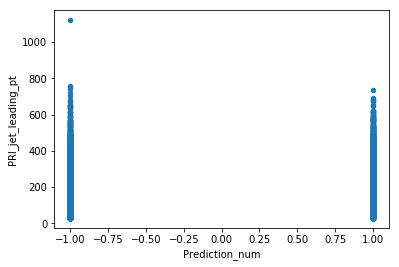

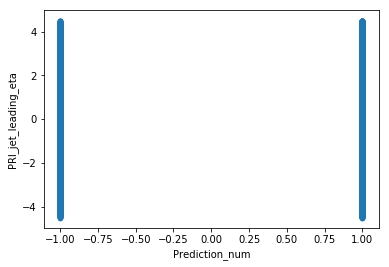

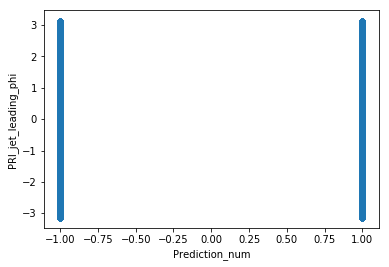

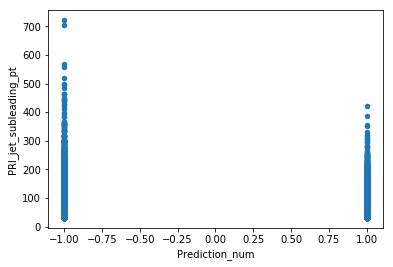

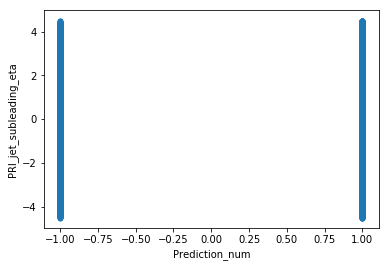

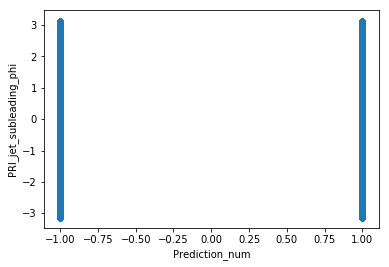

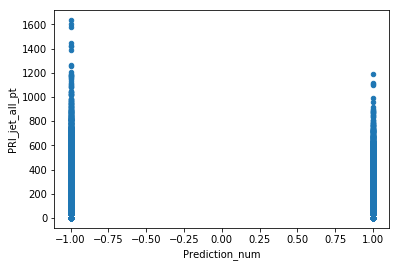

In [67]:
train_data['Prediction_num'] = prediction_num
train_data.